In [3]:
import numpy as np
from random import random 
from timeit import timeit

In [14]:
u = np.random.uniform(0.1, 10, size=(10, 10))
v = np.random.uniform(0.1, 10, size=(10, 10))

In [27]:
def matrix_multiply(u, v):
    m, n = u.shape
    n, p = v.shape
    res = np.zeros((m, p))
    for i in range(m):
        for j in range(p):
            for k in range(n):
                res[i, j] += u[i, k] * v[k, j]
    return res

In [30]:
%timeit matrix_multiply(u, v)

613 µs ± 24.7 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


In [32]:
%timeit np.matmul(u, v)

2.89 µs ± 231 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)


In [33]:
%timeit (u @ v)

2.32 µs ± 309 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)


We know FLOPS = 
$$
\frac{{\text{Total Number of floating point Operations} }}{{\text{Initial Distance}}}
$$
For all the above cases, the number of multiplications performed in each iteraion will be 2, which implies that floating point operations for each iteration will 4. Since we're performing 1000 iteration, our Total floating point operations becomes 4000. Hence FLOPS =
$$
\frac{{\text{2000} }}{{\text{613 µs }}} = \text{0.456}/{\text {s}}
$$

580 µs ± 25.7 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)
4.46 ms ± 108 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)
48.5 ms ± 17.5 ms per loop (mean ± std. dev. of 7 runs, 500 loops each)
202 ms ± 4.07 ms per loop (mean ± std. dev. of 7 runs, 50 loops each)
1.61 s ± 17.6 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


TypeError: float() argument must be a string or a real number, not 'TimeitResult'

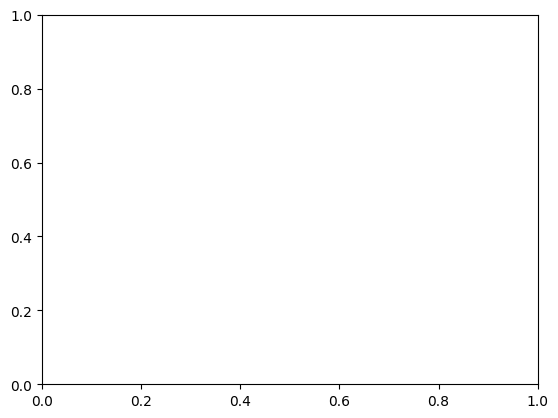

In [12]:
import numpy as np
import matplotlib.pyplot as plt

def matrix_multiply(u, v):
    m, n = u.shape
    n, p = v.shape
    res = np.zeros((m, p))
    for i in range(m):
        for j in range(p):
            for k in range(n):
                res[i, j] += u[i, k] * v[k, j]
    return res

matrix_sizes = [10, 20, 40, 80, 160]
execution_times = []
flops = []

# Set the initial matrix size
matrix_size = 10

# Define the number of runs
num_runs = 5

for i in range(num_runs):
    # Create random matrices with the current size
    u = np.random.rand(matrix_size, matrix_size)
    v = np.random.rand(matrix_size, matrix_size)

    # Measure the execution time for matrix multiplication using %timeit
    if i == 0 or i == 1:
        timeit_result = %timeit -r 7 -n 1000 -o matrix_multiply(u, v)
    elif i == 2:
        timeit_result = %timeit -r 7 -n 500  -o matrix_multiply(u, v)
    elif i == 3:
        timeit_result = %timeit -r 7 -n 50   -o matrix_multiply(u, v)
    else:
        timeit_result = %timeit -r 7 -n 10   -o matrix_multiply(u, v)

    # Convert execution time to seconds if it's in milliseconds
    # if timeit_result.best > 1.0:
    #     timeit_result.best /= 1000.0  # Convert to seconds

    # Calculate FLOPS based on execution time and matrix size
    # flops.append((2 * matrix_size**3) / (timeit_result * 1e9))  # 1e9 to convert to GFLOPS

    # Append the matrix size and execution time to the lists
    execution_times.append(timeit_result)

    # Double the matrix size for the next run
    matrix_size *= 2

# Plot the results
plt.figure()
plt.plot(matrix_sizes, execution_times, marker='o')
plt.title('Matrix Multiplication Performance (FLOPS)')
plt.xlabel('Matrix Size')
plt.ylabel('GFLOPS')
plt.grid(True)
plt.show()


For my PC, 12th Gen Intel(R) Core(TM) i5-1235U is having frequency 1.30 GHz

The maximum achievable FLOPS using the given Procesor frequency is 

In [1]:
%load_ext Cython
import cython

In [2]:
%%cython -a

# import numpy as np
# import cython

def cy_matmul(float[:,:] u, float[:,:] v, float[:,:] res):
# def cy_matmul(u, v, res):
    cdef int m, n, p
    cdef int i, j, k
    m = u.shape[0]
    n = u.shape[1]
    p = v.shape[1]
    # res = np.zeros((m, p))
    for i in range(m):
        for j in range(p):
            res[i,j] = 0
            for k in range(n):
                res[i,j] += u[i,k] * v[k,j]
    return res


DistutilsPlatformError: Microsoft Visual C++ 14.0 or greater is required. Get it with "Microsoft C++ Build Tools": https://visualstudio.microsoft.com/visual-cpp-build-tools/